In [1]:
import numpy as np

def simulate_network(dopamine_level=1.0, n_neurons=100, T=1000.0, dt=1.0, seed=0):
    """
    Very simple leaky integrate-and-fire network with dopamine-like modulation.
    dopamine_level scales synaptic weights.
    """
    steps = int(T / dt)

    tau_m = 20.0
    v_rest = -65.0
    v_reset = -70.0
    v_thresh = -50.0
    refrac_period = 5.0

    rng = np.random.default_rng(seed)

    # Random connectivity
    W = rng.normal(0.5, 0.2, size=(n_neurons, n_neurons))
    np.fill_diagonal(W, 0.0)
    W *= dopamine_level

    I_ext = rng.normal(18.0, 3.0, size=(n_neurons,))

    v = np.full(n_neurons, v_rest)
    refrac = np.zeros(n_neurons, dtype=int)
    spike_counts = np.zeros(n_neurons, dtype=int)

    for t in range(steps):
        active = refrac <= 0

        # simple noisy synaptic input
        syn_input = W @ (rng.random(n_neurons) < 0.01).astype(float)

        dv = (-(v - v_rest) + I_ext + syn_input) / tau_m * dt
        v[active] += dv[active]

        fired = np.where((v >= v_thresh) & active)[0]
        if fired.size > 0:
            v[fired] = v_reset
            refrac[fired] = int(refrac_period / dt)
            spike_counts[fired] += 1

        refrac[refrac > 0] -= 1

    firing_rates = spike_counts / (T / 1000.0)
    return firing_rates

# test different dopamine levels
for D in [0.5, 1.0, 1.5]:
    fr = simulate_network(dopamine_level=D)
    print(f"Dopamine level {D:.1f} → mean firing rate: {fr.mean():.2f} Hz")


Dopamine level 0.5 → mean firing rate: 19.55 Hz
Dopamine level 1.0 → mean firing rate: 20.63 Hz
Dopamine level 1.5 → mean firing rate: 21.42 Hz


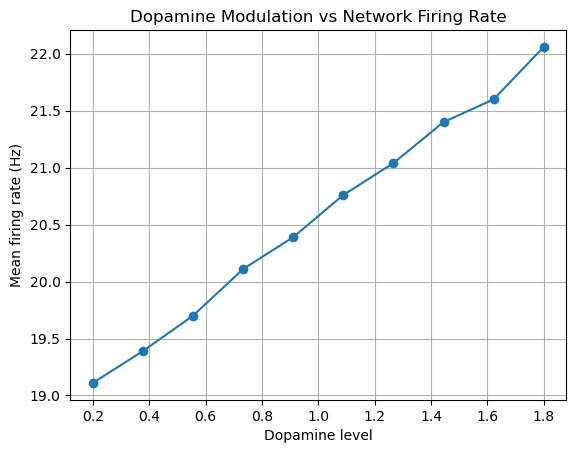

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dopamine_levels = np.linspace(0.2, 1.8, 10)
mean_rates = []

for D in dopamine_levels:
    fr = simulate_network(dopamine_level=D)
    mean_rates.append(fr.mean())

plt.plot(dopamine_levels, mean_rates, marker='o')
plt.xlabel("Dopamine level")
plt.ylabel("Mean firing rate (Hz)")
plt.title("Dopamine Modulation vs Network Firing Rate")
plt.grid(True)
plt.show()
